# Results postprocessing

In [ ]:
from ase import io
from tqdm import tqdm

dir_snaps = "/home/qklmn/repos/rotor-gp/code/results/temp/temp_calc_dir_0/ase_calc_history/"

snapshot_list = []
for i in tqdm(range(0,10000)):
    snapshot_list.append( io.read( dir_snaps+str(i)+".xyz", format="extxyz") )

In [ ]:
fmax_list = [snap.get_forces().max() for snap in snapshot_list]

In [ ]:
forces_ipi_raw_xyz = io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_dftb_ref/PREFIX.frc_00.xyz", index=":")

In [ ]:
forces_ipi_raw_xyz[0].get_chemical_symbols()[100]

In [ ]:
from ase import units
import numpy as np

forces_ipi = np.array( [s.get_positions()*(units.Hartree/units.Bohr) for s in forces_ipi_raw_xyz] )

In [ ]:
fmax = forces_ipi[:,:,0].max(axis=1)
fmin = forces_ipi[:,:,0].min(axis=1)

fabs_mean = np.abs(forces_ipi).mean()
fabs_var = np.abs(forces_ipi).var()

fmax.shape

In [ ]:
fabs_var

In [ ]:
import matplotlib.pyplot as plt


plt.plot(fmax[0:1000])
plt.plot(fmin)

plt.show()

# Check statistics within training data

In [ ]:
traj_dftb_2100 = io.read("/home/qklmn/data/datasets/rotors/different_temperatures/dftb/traj_2100.traj", index=":")
traj_dftb_300 = io.read("/home/qklmn/data/datasets/rotors/different_temperatures/dftb/traj_300.traj", index=":")

In [ ]:
fmax_300 = [snap.get_forces().max() for snap in traj_dftb_300]

In [ ]:
plt.plot(fmax_300)

## Check 1 vs. 16 beads

In [ ]:
from ase import io
import numpy as np

In [ ]:
traj_1 = io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_dftb_1/PREFIX.pos_0.xyz", index=":")
traj_16 = io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_dftb_16/PREFIX.pos_00.xyz", index=":")
traj_32 = io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_dftb_32/PREFIX.pos_10.xyz", index=":")
traj_64 = io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_dftb_64/PREFIX.pos_00.xyz", index=":")
# traj_16_centroid = io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_dftb_16/PREFIX.pos_centroid.xyz", index=":")



In [474]:
traj_1_good =  io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_dftb_good_1/PREFIX.pos_00.xyz", index=":")
traj_16_good =  io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_dftb_good_16/PREFIX.pos_00.xyz", index=":")

In [ ]:
distances_1 = [ snap.get_all_distances() for snap in traj_1] 
distances_1 = np.array(distances_1)

In [ ]:
distances_16 = [ snap.get_all_distances() for snap in traj_16]
distances_16 = np.array(distances_16)

In [475]:
distances_16_good = [ snap.get_all_distances() for snap in traj_16_good]
distances_16_good = np.array(distances_16_good)

In [ ]:
distances_32 = [ snap.get_all_distances() for snap in traj_32]
distances_32 = np.array(distances_32)

In [ ]:
distances_64 = [ snap.get_all_distances() for snap in traj_64]
distances_64 = np.array(distances_64)

In [ ]:
# distances_16_c = [ snap.get_all_distances() for snap in traj_16_centroid]
# distances_16_c = np.array(distances_16_c)

In [ ]:
distances_1.shape

In [ ]:
distances_64[:, dind[0], dind[1]].shape

In [ ]:
distances_16.shape

In [ ]:
traj_64[0][dind]

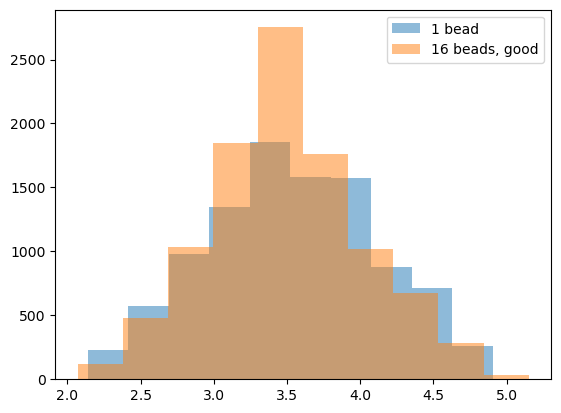

3.539150485655148 0.33839202903382004
3.5463263564422656 0.27040143128140015
3.410275416049538 0.34155854729044394
3.4504651106912796 0.35928115913686337


In [480]:
import matplotlib.pyplot as plt

dind = np.s_[119, 134] #dind = np.s_[7, 104]

plt.hist(distances_1[:, dind[0], dind[1]], label="1 bead", alpha=0.5)
# plt.hist(distances_16[:, dind[0], dind[1]], label="16 beads", alpha=0.5)
# plt.hist(distances_32[:, dind[0], dind[1]], label="32 beads", alpha=0.5)
# plt.hist(distances_64[:, dind[0], dind[1]], label="64 beads", alpha=0.5)
# plt.hist(distances_16_c, label="16 beads, centroid", alpha=0.5)

plt.hist(distances_16_good[:, dind[0], dind[1]], label="16 beads, good", alpha=0.5)

plt.legend()
plt.show()

print(distances_1[:, dind[0], dind[1]].mean(), distances_1[:, dind[0], dind[1]].var())
print(distances_16[:, dind[0], dind[1]].mean(), distances_16[:, dind[0], dind[1]].var())
print(distances_32[:, dind[0], dind[1]].mean(), distances_32[:, dind[0], dind[1]].var())
print(distances_64[:, dind[0], dind[1]].mean(), distances_64[:, dind[0], dind[1]].var())
# print(distances_16_c.mean(), distances_16_c.var())

In [409]:
layer_0 = [ 
        [106, 10, 26, 24], 
        [102, 6, 18, 16], 
        [104,8,44,42],     
        # [0,0,0,0],
        # [0,0,0,0],
        ]

layer_1 = [ 
        [103,9,45,47], 
        # [105,9,45,43], 
        [107,11,27,25],
        [107,7,19,21],       
        # [105,11,27,29] 
        ]


#Obtain normal indexing (from 0)
import numpy as np      
l0_v = np.array(layer_0)
l1_v = np.array(layer_1)

all_vert = np.array([l0_v, l1_v])

In [410]:
import numpy as np
from tqdm import tqdm

# import math

def normalize_angle_to_plus_minus_180(angle):
    result_angle = angle
    while result_angle > 180:
        result_angle -= 2 * 180
    while result_angle < - 180:
        result_angle += 2 * 180
    return result_angle 


def compute_angles(traj):
    # print("Started for indices:", indices)

    # traj = io.read(file_name, index=indices)
    L = len(traj)
    dihedrals = np.zeros( (2,4,L) )
    for ind, snap in tqdm(enumerate(traj)):
        for l in range(2):
                for r in range(3):
                    #     a = np.append(a, x)
                    # d = snap.get_dihedral(*all_vert[l,r,:])
                    dihedrals[l,r,ind] = normalize_angle_to_plus_minus_180( snap.get_dihedral(*all_vert[l,r,:]) )   
    # print("\n")
    # print("\nFinished for indices:", indices)
    return dihedrals

In [418]:
dihedrals_1 = compute_angles(traj_1)
dihedrals_16 = compute_angles(traj_16)
dihedrals_32 = compute_angles(traj_32)
dihedrals_64 = compute_angles(traj_64)

10001it [00:06, 1623.21it/s]
10001it [00:05, 1698.21it/s]
10001it [00:05, 1691.58it/s]
10001it [00:06, 1651.03it/s]


In [481]:
dihedrals_16_good = compute_angles(traj_16_good)

10001it [00:06, 1598.23it/s]


In [ ]:
dihedrals_16_c = compute_angles(traj_16_centroid)

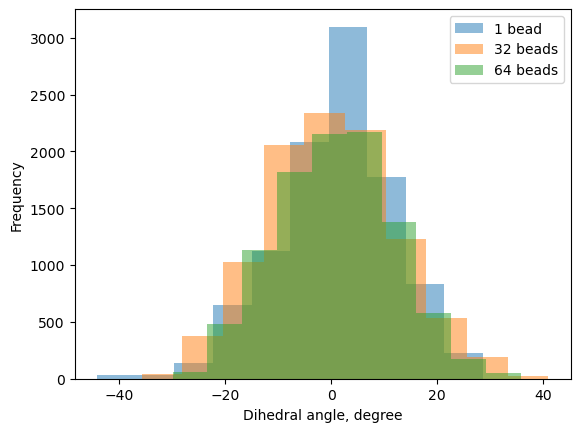

0.8270941286295868 116.78775465060092
0.10661985824049923 144.6467341697435
0.8276648040470974 118.3627463773979


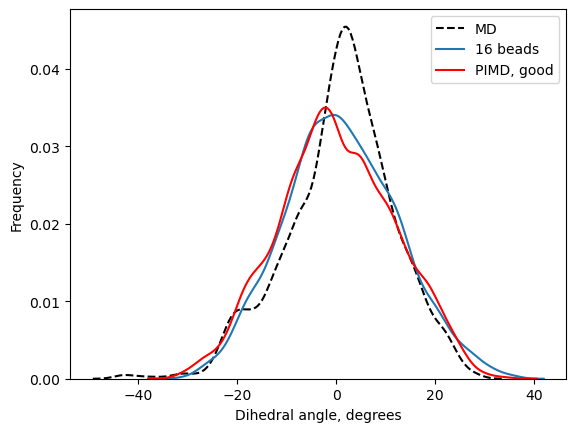

In [486]:
import matplotlib.pyplot as plt
import seaborn as sns

lr = np.s_[0, 0] # [1,0] is good

plt.hist(dihedrals_1[lr], label="1 bead", alpha=0.5)
# plt.hist(dihedrals_16[lr], label="16 beads", alpha=0.5)
plt.hist(dihedrals_32[lr], label="32 beads", alpha=0.5)
plt.hist(dihedrals_64[lr], label="64 beads", alpha=0.5)
# plt.hist(dihedrals_16_c[lr], label="16 beads, centroid")
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Dihedral angle, degree")
plt.show()

print(dihedrals_1[lr].mean(), dihedrals_1[lr].var())
print(dihedrals_32[lr].mean(), dihedrals_32[lr].var())
print(dihedrals_64[lr].mean(), dihedrals_64[lr].var())
# print(dihedrals_16_c[lr].mean(), dihedrals_16_c[lr].var())

sns.kdeplot(dihedrals_1[lr], label="MD", linestyle='dashed', color='black')
sns.kdeplot(dihedrals_16[lr], label="16 beads")
# sns.kdeplot(dihedrals_32[lr], label="32 beads")
# sns.kdeplot(dihedrals_64[lr], label="PIMD", color='black')

sns.kdeplot(dihedrals_16_good[lr], label="PIMD, good", color='red')

plt.ylabel("Frequency")
plt.xlabel("Dihedral angle, degrees")
plt.legend()
plt.show()

In [ ]:
import os
from ase.calculators.dftb import Dftb
from ase.io import read
os.environ['OMP_NUM_THREADS'] = "6,1"
os.environ["ASE_DFTB_COMMAND"] = "ulimit -s unlimited; /usr/local/dftbplus-21.2/bin/dftb+ > PREFIX.out"
# os.environ["ASE_DFTB_COMMAND"] = "dftb+ > PREFIX.out"
os.environ["DFTB_PREFIX"] = "/home/qklmn/data/dftb/pbc-0-3"

atoms = read('/home/qklmn/data/starting_configuration/1.cif') # atoms specified here should be the same as in i-pi input file (otherwise atomic order differ, structure blows up!)

atoms_copy = atoms.copy()

atoms_copy.set_pbc(True)

# calc = Dftb(atoms=atoms_copy,
#         label='crystal',
#         Hamiltonian_ = "xTB",
#         Hamiltonian_Method = "GFN1-xTB",
#         # Hamiltonian_MaxAngularMomentum_='',
#         # Hamiltonian_MaxAngularMomentum_O='p',
#         # Hamiltonian_MaxAngularMomentum_H='s',
#         # Hamiltonian_MaxAngularMomentum_N='s',
#         # Hamiltonian_MaxAngularMomentum_C='s',
#         # Hamiltonian_MaxAngularMomentum_Si='s',
#         kpts=(1,1,1),
#         # Hamiltonian_SCC='Yes',
#         # Verbosity=0,
#         # Hamiltonian_OrbitalResolvedSCC = 'Yes',
#         # Hamiltonian_SCCTolerance=1e-15,
#         # kpts=None,
#         # Driver_='ConjugateGradient',
#         # Driver_MaxForceComponent=1e-3,
#         # Driver_MaxSteps=200,
#         # Driver_LatticeOpt = 'Yes',
#         #     Driver_AppendGeometries = 'Yes',
#         #     Driver_='',
#         #     Driver_Socket_='',
#         #     Driver_Socket_File='Hello'
#         )

calc = Dftb(atoms=atoms_copy,
        label='crystal',
        # Hamiltonian_ = "xTB",
        # # Hamiltonian_Method = "GFN1-xTB",
        Hamiltonian_MaxAngularMomentum_='',
        Hamiltonian_MaxAngularMomentum_H='s',
        Hamiltonian_MaxAngularMomentum_O='p',
        Hamiltonian_MaxAngularMomentum_N='p',
        Hamiltonian_MaxAngularMomentum_C='p',
        Hamiltonian_MaxAngularMomentum_Si='d',
        kpts=(2,1,1),
        Hamiltonian_SCC='Yes',
        # Verbosity=0,
        # Hamiltonian_OrbitalResolvedSCC = 'Yes',
        # Hamiltonian_SCCTolerance=1e-15,
        # kpts=None,
        # Driver_='ConjugateGradient',
        # Driver_MaxForceComponent=1e-3,
        # Driver_MaxSteps=200,
        # Driver_LatticeOpt = 'Yes',
        #     Driver_AppendGeometries = 'Yes',
        #     Driver_='',
        #     Driver_Socket_='',
        #     Driver_Socket_File='Hello'
        )

atoms_copy.set_calculator(calc)

# print( atoms_copy.get_potential_energy() )
print( atoms_copy.get_forces() )


In [ ]:
atoms_copy.get_pbc()